In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler


In [67]:
pd.set_option("display.max_columns",None)

In [68]:
df = pd.read_pickle('./converted-data.pkl')

In [69]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,HourOfDay,Day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0


In [70]:
X = df.drop("Class" , axis=1)
y = df["Class"]

In [71]:
np.random.seed(42)

X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, 
            test_size=0.3, 
            random_state=42, 
            shuffle=True,
            stratify=y
        )

X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, 
            test_size=0.50,
            random_state=42, 
            shuffle=True,
            stratify=y_temp 
        )


In [72]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [73]:
over = SMOTE(sampling_strategy=0.1, random_state=42)  # upsample minority
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # downsample majority

# Pipeline: SMOTE → UnderSampling
resample_pipeline = Pipeline(steps=[('o', over), ('u', under)])
X_resampled, y_resampled = resample_pipeline.fit_resample(X_train, y_train)


In [74]:
LR = LogisticRegression(max_iter=300 , C = .1)
LR.fit(X_resampled , y_resampled)

LogisticRegression(C=0.1, max_iter=300)

In [75]:
print("===================Performance on Training Data==================")
y_pred_train = LR.predict(X_resampled)
print(classification_report(y_resampled, y_pred_train))

print("===================Performance on Validation Data==================")
y_pred_val= LR.predict(X_val)
print(classification_report(y_val, y_pred_val))

print("===================Performance on Test Data==================")
y_pred_test = LR.predict(X_test)
print(classification_report(y_test, y_pred_test))

===================Performance on Training Data==================
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39654
           1       0.97      0.90      0.93     19827

    accuracy                           0.96     59481
   macro avg       0.96      0.94      0.95     59481
weighted avg       0.96      0.96      0.96     59481

===================Performance on Validation Data==================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42488
           1       0.10      0.89      0.17        71

    accuracy                           0.99     42559
   macro avg       0.55      0.94      0.58     42559
weighted avg       1.00      0.99      0.99     42559

===================Performance on Test Data==================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42488
           1       0.11      0.89      0.

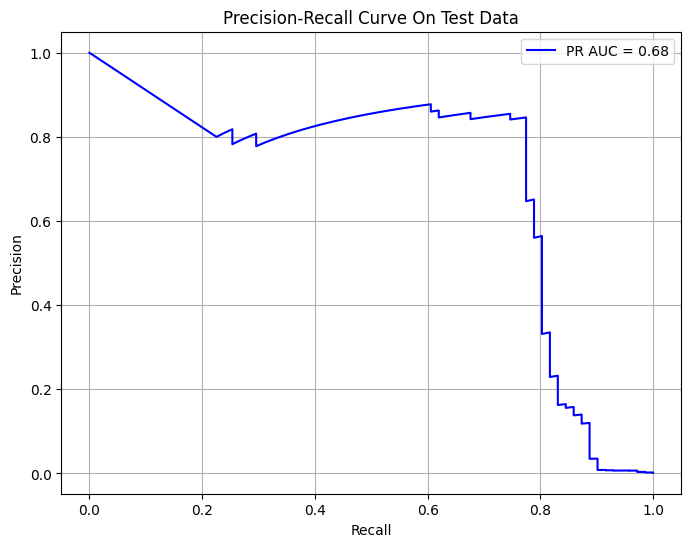

In [76]:
y_scores = LR.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve On Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
xgb_model = XGBClassifier(n_estimators=1000, subsample = .8, learning_rate=0.1,max_depth=5,
                          min_child_weight =  3,
                          random_state = 42,
                          reg_alpha=2,   
                          reg_lambda=2,
                          )
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
print("===================Performance on Training Data==================")
y_pred_train = xgb_model.predict(X_resampled)
print(classification_report(y_resampled, y_pred_train))

print("===================Performance on Validation Data==================")
y_pred_val= xgb_model.predict(X_val)
print(classification_report(y_val, y_pred_val))

print("===================Performance on Testing Data==================")
y_pred_test = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_test))

===================Performance on Training Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39654
           1       1.00      1.00      1.00     19827

    accuracy                           1.00     59481
   macro avg       1.00      1.00      1.00     59481
weighted avg       1.00      1.00      1.00     59481

===================Performance on Validation Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.60      0.79      0.68        71

    accuracy                           1.00     42559
   macro avg       0.80      0.89      0.84     42559
weighted avg       1.00      1.00      1.00     42559

===================Performance on Testing Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.60      0.82     

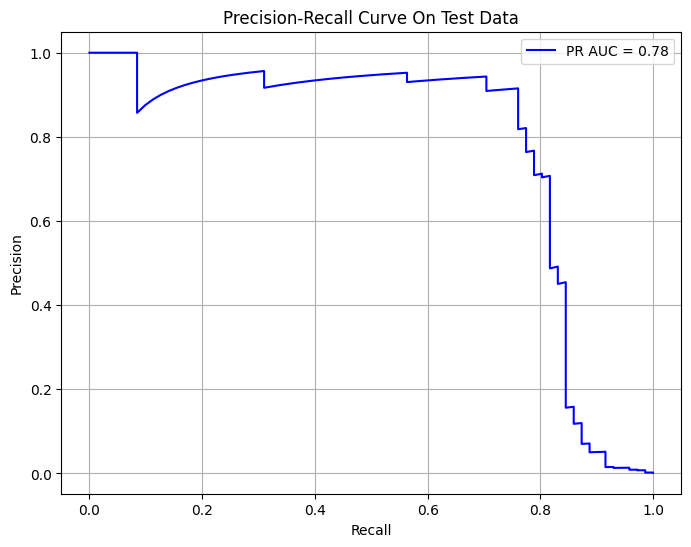

In [79]:
y_scores = xgb_model.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve On Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
DTC = DecisionTreeClassifier(max_depth=5, min_samples_split = 2,min_samples_leaf = 2,random_state=42)

DTC.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [82]:
print("===================Performance on Training Data==================")
y_pred_train = DTC.predict(X_resampled)
print(classification_report(y_resampled, y_pred_train))

print("===================Performance on Validation Data==================")
y_pred_val= DTC.predict(X_val)
print(classification_report(y_val, y_pred_val))

print("===================Performance on Testing Data==================")
y_pred_test = DTC.predict(X_test)
print(classification_report(y_test, y_pred_test))

===================Performance on Training Data==================
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     39654
           1       0.98      0.91      0.94     19827

    accuracy                           0.96     59481
   macro avg       0.97      0.95      0.96     59481
weighted avg       0.96      0.96      0.96     59481

===================Performance on Validation Data==================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42488
           1       0.12      0.82      0.20        71

    accuracy                           0.99     42559
   macro avg       0.56      0.90      0.60     42559
weighted avg       1.00      0.99      0.99     42559

===================Performance on Testing Data==================
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42488
           1       0.12      0.80     

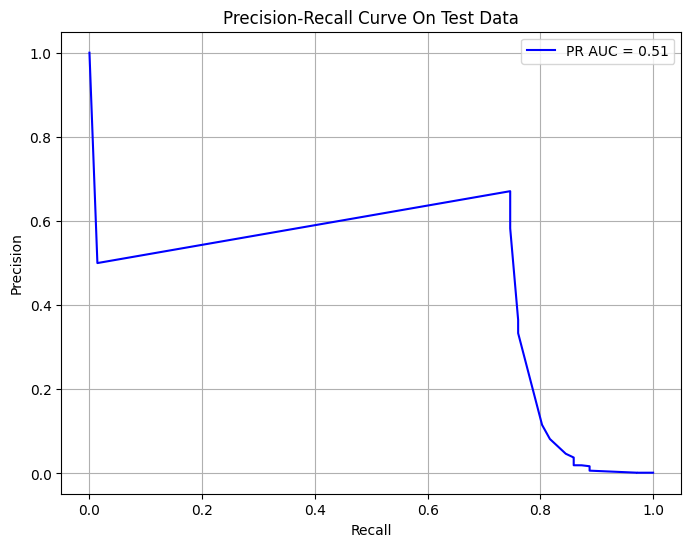

In [83]:
y_scores = DTC.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve On Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [85]:
print("===================Performance on Training Data==================")
y_pred_train = knn.predict(X_resampled)
print(classification_report(y_resampled, y_pred_train))

print("===================Performance on Validation Data==================")
y_pred_val= knn.predict(X_val)
print(classification_report(y_val, y_pred_val))

print("===================Performance on Testing Data==================")
y_pred_test = knn.predict(X_test)
print(classification_report(y_test, y_pred_test))

===================Performance on Training Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39654
           1       1.00      1.00      1.00     19827

    accuracy                           1.00     59481
   macro avg       1.00      1.00      1.00     59481
weighted avg       1.00      1.00      1.00     59481

===================Performance on Validation Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.22      0.83      0.35        71

    accuracy                           0.99     42559
   macro avg       0.61      0.91      0.68     42559
weighted avg       1.00      0.99      1.00     42559

===================Performance on Testing Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.24      0.86     

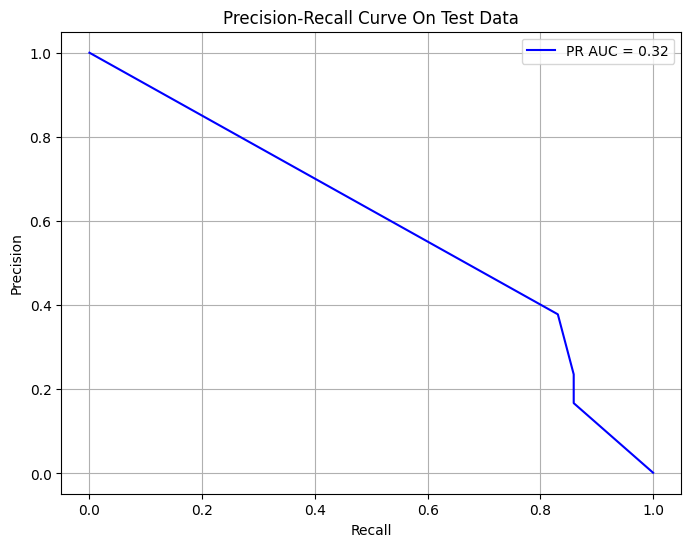

In [86]:
y_scores = knn.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve On Test Data')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [88]:
print("===================Performance on Training Data==================")
y_pred_train = rf.predict(X_resampled)
print(classification_report(y_resampled, y_pred_train))

print("===================Performance on Validation Data==================")
y_pred_val= rf.predict(X_val)
print(classification_report(y_val, y_pred_val))

print("===================Performance on Testing Data==================")
y_pred_test = rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

===================Performance on Training Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39654
           1       1.00      1.00      1.00     19827

    accuracy                           1.00     59481
   macro avg       1.00      1.00      1.00     59481
weighted avg       1.00      1.00      1.00     59481

===================Performance on Validation Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.70      0.80      0.75        71

    accuracy                           1.00     42559
   macro avg       0.85      0.90      0.87     42559
weighted avg       1.00      1.00      1.00     42559

===================Performance on Testing Data==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.65      0.82     

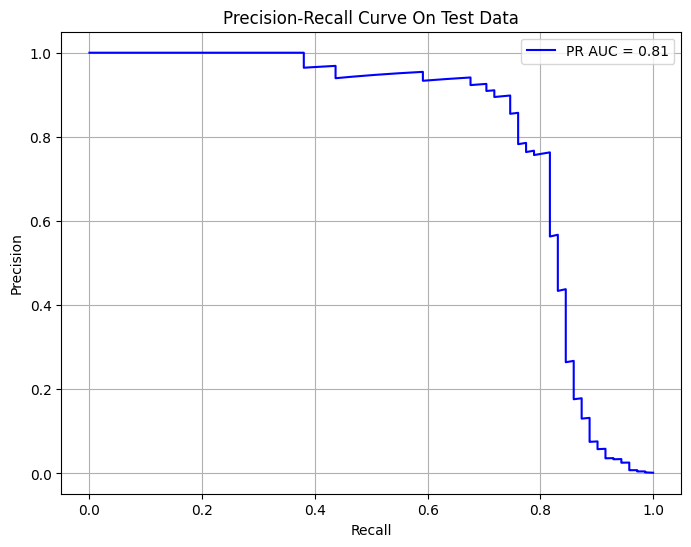

In [89]:
y_scores = rf.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve On Test Data')
plt.legend()
plt.grid(True)
plt.show()
